# Bayesian Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import multivariate_normal

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.set_printoptions(precision=4)

Suppose we are given a dataset $\mathcal{D}=\left\{({\bf x}_n, y_n)\vert {\bf x}_n \in \mathbb{R}^M, y_n\in\mathbb{R} \right\}_{n=1}^N$. Where each element $y_n$ is modelled as


$$
    y_n\vert {\bf x}_n \sim \mathcal{N}({\bf w}^T{\bf x}, \sigma^2)
$$

Furthermore, we we assign $\bf w$ a *prior* distribution of the form ${\bf w}\sim\mathcal{N}(\boldsymbol\mu_0, \boldsymbol\Sigma_0)$. Our goal is to find the *posterior* distribution ${\bf w}\vert \mathcal{D}$, i.e.,


$$
\begin{aligned}
p({\bf w}\vert \mathcal{D}) &\propto p({\bf w})p(\mathcal D\vert {\bf w})\\
&= \mathcal{N}({\bf w}\vert \boldsymbol\mu_0, \boldsymbol\Sigma_0) \mathcal{N}({\bf y} \vert {\bf X}{\bf w}, \sigma^2{\bf I})
\end{aligned}
$$

To find the posterior conjugate (a closed-form solution), note that

$$
    {\bf z}^T{\bf A}{\bf z} - 2{\bf z}^T{\bf b} + c = ({\bf z} - {\bf A}^{-1}{\bf b})^T{\bf A}({\bf z} - {\bf A}^{-1}{\bf b}) - {\bf b}^T{\bf A}^{-1}{\bf b} + c
$$

Then,
$$
\begin{align}
    p({\bf w}\vert \mathcal{D}) &\propto \exp\left(-\frac{1}{2} ({\bf w} - \boldsymbol\mu_0)^T\Sigma_0^{-1}({\bf w} - \boldsymbol\mu_0) -\frac{1}{2\sigma^2} ({\bf y} - {\bf X w})^T({\bf y} - {\bf X w}) \right)\\
    &= \exp\left(-\frac{1}{2}\left( ({\bf w} - \boldsymbol\mu_0)^T\Sigma_0^{-1}({\bf w} - \boldsymbol\mu_0) +\frac{1}{\sigma^2} ({\bf y} - {\bf X w})^T({\bf y} - {\bf X w})\right) \right)\\
    &\propto \exp\left(-\frac{1}{2}\left[{\bf w}^T \left(\boldsymbol\Sigma_0^{-1} + \frac{1}{\sigma^2}{\bf X}^T{\bf X}\right) - 2{\bf w}^T \left(\boldsymbol\Sigma_0^{-1}\boldsymbol\mu_0 + \frac{1}{\sigma^2}{\bf X}^T{\bf y}\right) \right]\right)
\end{align}
$$

This last expression reduces to

$$
    p({\bf w}\vert \mathcal{D}) \propto \exp\left(-\frac{1}{2}({\bf w} - {\bf m}_N)^T {\bf S}_N^{-1} ({\bf w} - {\bf m}_N)\right)
$$

Where
* ${\bf S}_N^{-1} = \boldsymbol\Sigma_0^{-1} + \frac{1}{\sigma^2}{\bf X}^T{\bf X}$
* ${\bf m}_N = {\bf S}_N \left(\boldsymbol\Sigma_0^{-1}\boldsymbol\mu_0 + \frac{1}{\sigma^2}{\bf X}^T{\bf y}\right)$

Using a bayesian perspective, there does not exist *a* vector of weights $\bf w$; rather, $\bf w$ is a random variable that we can sample from.

## An example

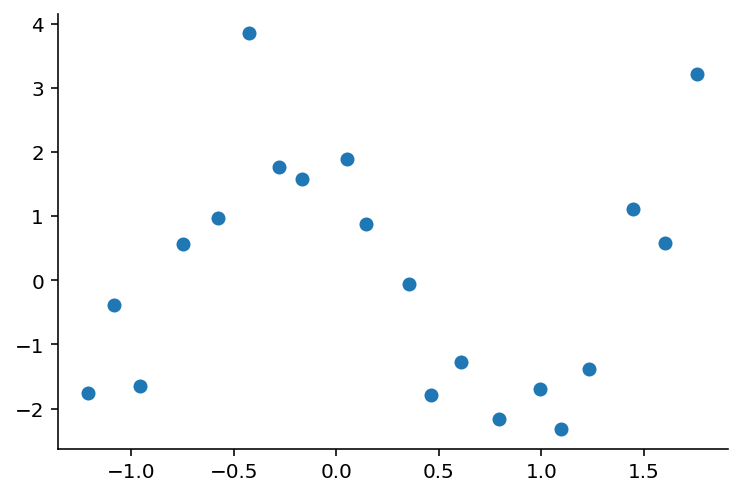

In [3]:
np.random.seed(314)

n_obs = 20
# sigma is a known value
sigma = 0.8
x = np.linspace(-1.3, 1.7, n_obs) + np.random.rand(n_obs) * 0.1
y = 1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3 + np.random.randn(n_obs) * sigma

plt.scatter(x, y)

In [4]:
X = np.stack((np.ones_like(x), x, x ** 2, x ** 3), axis=1)
X

array([[ 1.0000e+00, -1.2083e+00,  1.4600e+00, -1.7642e+00],
       [ 1.0000e+00, -1.0833e+00,  1.1734e+00, -1.2711e+00],
       [ 1.0000e+00, -9.5771e-01,  9.1720e-01, -8.7841e-01],
       [ 1.0000e+00, -7.4800e-01,  5.5950e-01, -4.1850e-01],
       [ 1.0000e+00, -5.7662e-01,  3.3249e-01, -1.9172e-01],
       [ 1.0000e+00, -4.2779e-01,  1.8300e-01, -7.8288e-02],
       [ 1.0000e+00, -2.7984e-01,  7.8308e-02, -2.1914e-02],
       [ 1.0000e+00, -1.6869e-01,  2.8456e-02, -4.8002e-03],
       [ 1.0000e+00,  5.4334e-02,  2.9522e-03,  1.6041e-04],
       [ 1.0000e+00,  1.4713e-01,  2.1647e-02,  3.1848e-03],
       [ 1.0000e+00,  3.5558e-01,  1.2644e-01,  4.4960e-02],
       [ 1.0000e+00,  4.6300e-01,  2.1436e-01,  9.9250e-02],
       [ 1.0000e+00,  6.0697e-01,  3.6841e-01,  2.2361e-01],
       [ 1.0000e+00,  7.9123e-01,  6.2605e-01,  4.9535e-01],
       [ 1.0000e+00,  9.9453e-01,  9.8910e-01,  9.8369e-01],
       [ 1.0000e+00,  1.0962e+00,  1.2017e+00,  1.3174e+00],
       [ 1.0000e+00,  1.

In [5]:
α = 1.2
m = 4
Σ0 = np.eye(m) * α
μ0 = np.zeros((m, 1))

In [6]:
SN_inv = inv(Σ0) + X.T @ X / sigma ** 2
SN = inv(SN_inv)

mN = SN @ (inv(Σ0) @ μ0 + X.T @ y[:, None] / sigma ** 2)
# The vector of average weights
mN

array([[ 0.794 ],
       [-2.7186],
       [-1.6215],
       [ 2.1555]])

In [7]:
n_test = 100
xtest = np.linspace(-1.3, 1.8, n_test)
Xtest = np.stack((np.ones_like(xtest), xtest, xtest ** 2, xtest ** 3))

In [8]:
n_samples = 20
# We create an instance of our random vector w
w = multivariate_normal(mean=mN.ravel(), cov=SN)
w_sample = w.rvs(n_samples)

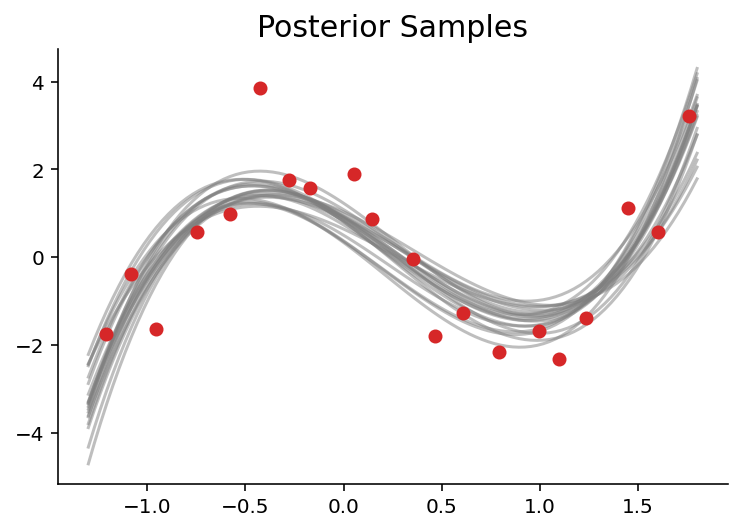

In [9]:
y_test_sample = np.einsum("km,mn->nk", w_sample, Xtest)

plt.plot(xtest, y_test_sample, c="tab:gray", alpha=0.5, zorder=1)
plt.scatter(x, y, c="tab:red", zorder=2)
plt.title("Posterior Samples", fontsize=15);